<a href="https://colab.research.google.com/github/raymond92928/S5BAI/blob/main/Pytorch/Neural_Network(NN)_%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=aircAruvnKk

# Activation function

## Sigmoid function

$$ f(x) = \frac{1}{1+e^{-x}}$$

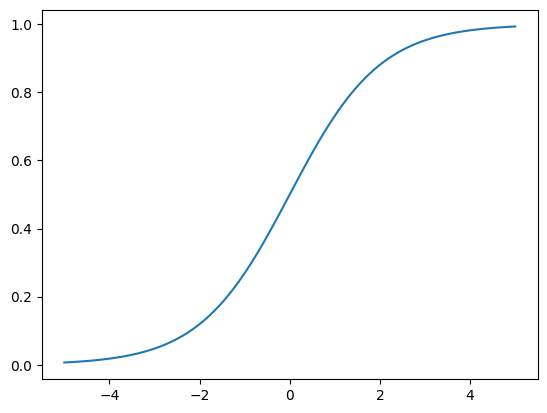

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)
y = 1/(1+np.exp(-x))
plt.plot(x,y)
plt.show()

## Tanh function

$$ f(x) = \frac{e^x - e^{-x}}{e^x+e^{-x}} $$

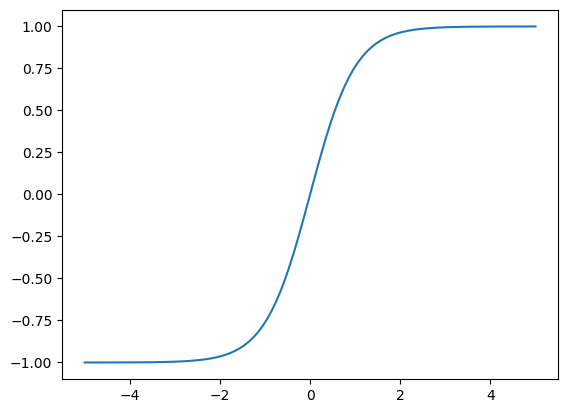

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)
y = (np.exp(x) - np.exp(-x))/ (np.exp(x) + np.exp(-x))
plt.plot(x,y)
plt.show()

## ReLU functoin

$$ f(x) = max(0, x) $$

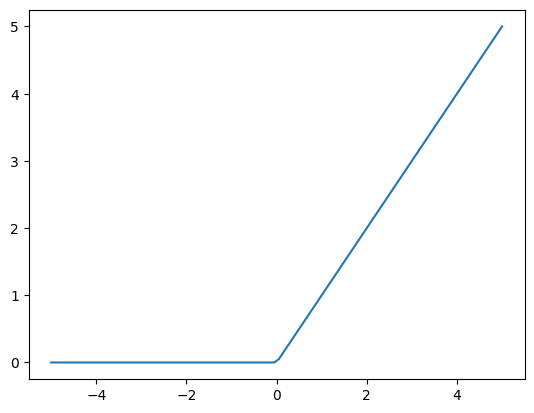

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)
y = [max(0, i) for i in x]
plt.plot(x,y)
plt.show()

## LeakyReLU function

$$ 
f(n) =
  \begin{cases}
    x       & \quad x\geq 0\\
    \frac{x}{a}  & \quad x<0
  \end{cases}
$$

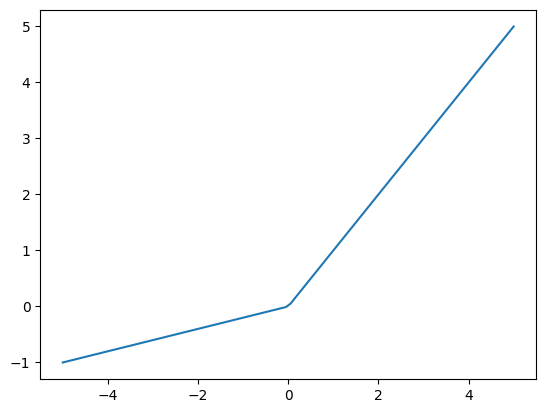

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, a):
    if x >= 0:
        return x
    else:
        return x/a
    
x = np.linspace(-5, 5, 100)
a = 5
y = [f(i, a) for i in x]
plt.plot(x,y)
plt.show()

## Softmax function

$$ f(x) = \frac{e^{x_j}}{\sum_{i=1}^N e^{x_i}} \quad \text{for} j = 1, \cdots, N $$

In [ ]:
import numpy as np

def softmax(x):
    return np.exp(x)/sum(np.exp(x))

x = np.array([1,2,3,4])
y = softmax(x) # map all the elements between 0 to 1
print(y)

[0.0320586  0.08714432 0.23688282 0.64391426]


# Loss function

## MSE (In regression problems)

$$ loss = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

## Corss-entropy (In classification problems)

$$ loss = -\frac{1}{n}\sum_{i=1}^n y_i * \log(\hat{y}_i) + (1-y_i) * \log(1- \hat{y}_i) $$

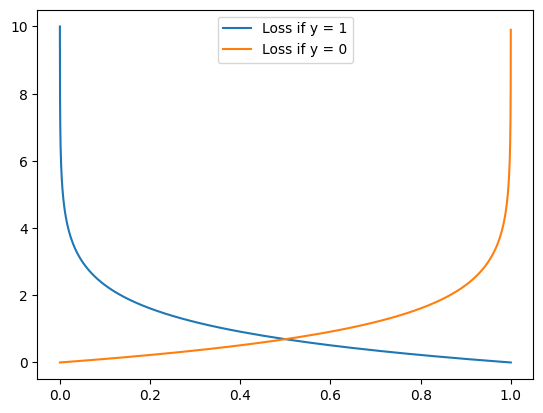

In [ ]:
def sigmoid(z):
    return 1./(1. + np.exp(-z))

def cross_entropy_loss(pred, y):
    if y == 1:
        return -np.log(pred)
    else:
        return -np.log(1-pred)
    
z = np.arange(-10, 10, 0.1)
x = sigmoid(z)

cost_1 = cross_entropy_loss(x, 1)
cost_0 = cross_entropy_loss(x, 0)

plt.plot(x, cost_1, label = "Loss if y = 1")
plt.plot(x, cost_0, label = "Loss if y = 0")
plt.legend(loc = 'best')
plt.show()

# Backpropagation

## Gradient descent 梯度下降法

$$ 
w = w - \alpha \frac{\partial L}{\partial w} \\
b = b - \alpha \frac{\partial L}{\partial b} 
$$
$L$ : loss function

$\alpha$: learning rate

# Optimizer

## SGD

$$ \theta = \theta - \alpha * \frac{\partial L}{\partial \theta}
$$

## Momentum

$$
v = \beta_1 v + \alpha * \frac{\partial L}{\partial \theta}\\
\theta = \theta - v
$$
$\beta$ like a coefficient of friction, set 0.9.

## Adagrad

$$ \theta = \theta - \frac{\alpha}{\sqrt{SSG_i + \varepsilon}} * \frac{\partial L}{\partial \theta}
$$
$$SSG_i = (\frac{\partial L}{\partial \theta})^2$$

## Adadelta

$$ \theta = \theta - \frac{\alpha}{\sqrt{SSG_i + \varepsilon}} * \frac{\partial L}{\partial \theta}
$$
$$
SSG_i = \beta_2 * SSG_i + (1-\beta_2)*(\frac{\partial L}{\partial \theta})^2
$$

## Adam

$$ 
v_i = \beta_1 v + (1-\beta_i)*\frac{\partial L}{\partial \theta}\\
SSG_i = \beta_2 * SSG_i (1-\beta_2) * (\frac{\partial L}{\partial \theta})^2\\
\theta_i = \theta_i - \frac{\alpha}{\sqrt{SSG_i + \varepsilon}} * v_i
$$
$\beta_1 = 0.9, \beta_2 = 0.999$

# torch.nn

![image.png](attachment:image.png)

In [ ]:
import torch
import torch.nn as nn
model = nn.Sequential(
    nn.Linear(3,3),
    nn.Sigmoid(),
    nn.Linear(3,1)
)

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=3, out_features=3, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=3, out_features=1, bias=True)
)


# Exercise

$$ y = 1 + 3*x_1 + 5*x_2 +e = Xw + e$$
$X = [1, x_1, x_2]\\
w = [1,3,5]^T\\
e:error$

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(0)
w=torch.tensor([1,3,5]).float()
X=torch.cat([torch.ones(100,1),torch.randn(100,2)], dim=1)
y=torch.mv(X, w) + torch.randn(100)*0.3
y=y.unsqueeze(1)
print(X.shape, y.shape)

torch.Size([100, 3]) torch.Size([100, 1])


In [ ]:
model=nn.Sequential(nn.Linear(3,1, bias=False))

In [ ]:
myloss=nn.MSELoss()
myoptim=optim.Adam(model.parameters(), lr=0.1)

In [ ]:
losses=[]
epochs=101
for epoch in range(epochs):
    y_pred=model(X)  # predict
    loss=myloss(y_pred, y) # calculate the value of loss function
    losses.append(loss.item())
    myoptim.zero_grad()
    loss.backward()
    myoptim.step()
    
    if epoch % 20 == 0:
        print(f"epoch={epoch}, loss={loss.item():.3f}")

epoch=0, loss=42.603
epoch=20, loss=14.651
epoch=40, loss=3.828
epoch=60, loss=0.944
epoch=80, loss=0.202
epoch=100, loss=0.089


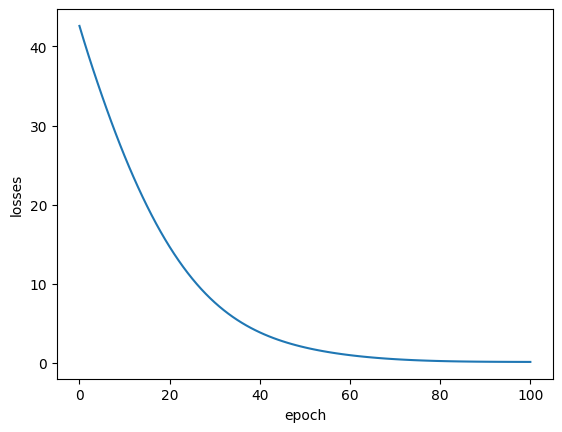

In [ ]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("losses")
plt.show()

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.0021, 3.0376, 4.9707]], requires_grad=True)]
